In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('../../datasets/vehicles.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [9]:
df.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [10]:
df.head(3)

Make                Model  Year  Engine Displacement  Cylinders  \
0  AM General    DJ Po Vehicle 2WD  1984                  2.5        4.0   
1  AM General     FJ8c Post Office  1984                  4.2        6.0   
2  AM General  Post Office DJ5 2WD  1985                  2.5        4.0   

      Transmission        Drivetrain                Vehicle Class Fuel Type  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   Regular   

   Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0          19.388824        18           17            17   
1          25.354615        13           13            13   
2          20.600625        16           17            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100

In [11]:
df['Cylinders'].corr(df['Combined MPG'])

-0.6986478600965416

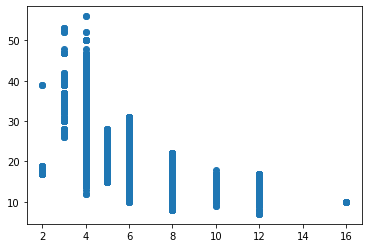

In [13]:
plt.scatter(df['Cylinders'],df['Combined MPG'])

# Pearson
## Supestos
### 1. Muestra Aleattoria: debe repreedntar una población de manera representativa.
### 2. Las variables sean datos continuos: Deben ser variables medidas en escala continua
###    (peso, temperatura, velocidad). no usar variables como categorias.
### 3. Todos los datos tengan su equivalente: cada valor x tenga su equivalente y
### 4. Son independientes.
### 5. Exista una asociación lineal
### 6. No tener outliers



In [14]:
# covarianza - entre más negativo, mayor relación negativa, + positivo, + realación positiva.
# no son estandarizados
df.cov()

Year  Engine Displacement   Cylinders  \
Year                     101.713065             0.519273    1.459896   
Engine Displacement        0.519273             1.847956    2.151927   
Cylinders                  1.459896             2.151927    3.080967   
Fuel Barrels/Year         -9.960687             4.796011    5.798763   
City MPG                   7.783484            -4.799797   -5.892401   
Highway MPG               15.878169            -5.726053   -6.724015   
Combined MPG              10.556963            -5.189978   -6.269421   
CO2 Emission Grams/Mile -266.928999           130.050228  157.237699   
Fuel Cost/Year          -469.934524           530.429000  692.437947   

                         Fuel Barrels/Year     City MPG  Highway MPG  \
Year                             -9.960687     7.783484    15.878169   
Engine Displacement               4.796011    -4.799797    -5.726053   
Cylinders                         5.798763    -5.892401    -6.724015   
Fuel Barrels/Year                19.956615   -18.701400   -23.938899   
City MPG                        -18.701400    22.746688    25.956318   
Highway MPG                     -23.938899    25.956318    34.702424   
Combined MPG                    -20.777227    24.028256    29.194757   
CO2 Emission Grams/Mile         524.532182  -507.729799  -649.754558   
Fuel Cost/Year                 2074.962381 -2076.084458 -2542.658340   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                        10.556963              -266.928999     -469.934524  
Engine Displacement         -5.189978               130.050228      530.429000  
Cylinders                   -6.269421               157.237699      692.437947  
Fuel Barrels/Year          -20.777227               524.532182     2074.962381  
City MPG                    24.028256              -507.729799    -2076.084458  
Highway MPG                 29.194757              -649.754558    -2542.658340  
Combined MPG                26.136725              -563.783910    -2268.286203  
CO2 Emission Grams/Mile   -563.783910             14175.467724    56185.983710  
Fuel Cost/Year           -2268.286203             56185.983710   257007.049913

In [15]:
# correlación por defecto de pandas utiliza Pearson
df.corr()

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                 1.000000 -0.877752    -0.909664   
City MPG                         -0.877752  1.000000     0.923856   
Highway MPG                      -0.909664  0.923856     1.000000   
Combined MPG                     -0.909743  0.985457     0.969392   
CO2 Emission Grams/Mile           0.986189 -0.894139    -0.926405   
Fuel Cost/Year                    0.916208 -0.858645    -0.851404   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.204751                -0.222300       -0.091913  
Engine Displacement         -0.746782                 0.803520        0.769678  
Cylinders                   -0.698648                 0.752393        0.778153  
Fuel Barrels/Year           -0.909743                 0.986189        0.916208  
City MPG                     0.985457                -0.894139       -0.858645  
Highway MPG                  0.969392                -0.926405       -0.851404  
Combined MPG                 1.000000                -0.926229       -0.875185  
CO2 Emission Grams/Mile     -0.926229                 1.000000        0.930865  
Fuel Cost/Year              -0.875185                 0.930865        1.000000

In [47]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [69]:
df_makers = df.groupby(['Make']).agg({'Engine Displacement':'mean', 'City MPG':'mean'}).reset_index()
df_makers

Make  Engine Displacement   City MPG
0                     AM General             3.350000  15.000000
1               ASC Incorporated             3.800000  14.000000
2                          Acura             2.834768  18.890728
3                     Alfa Romeo             2.556098  17.097561
4    American Motors Corporation             3.813636  16.045455
..                           ...                  ...        ...
122                   Volkswagen             2.236008  21.226361
123                        Volvo             2.504742  17.981869
124        Wallace Environmental             4.315625  12.437500
125                         Yugo             1.200000  23.000000
126                        smart             0.980000  33.300000

[127 rows x 3 columns]

In [70]:
x = df_makers['Engine Displacement']
y = df_makers['City MPG']

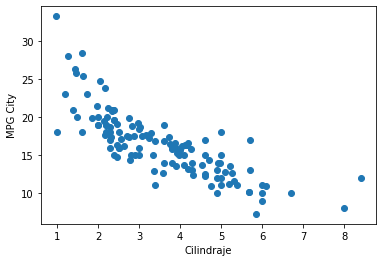

In [71]:
plt.xlabel('Cilindraje')
plt.ylabel('MPG City')
plt.scatter(x,y)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001A8192E2160>, <matplotlib.lines.Line2D object at 0x000001A8192E2E50>, <matplotlib.lines.Line2D object at 0x000001A8177955B0>, <matplotlib.lines.Line2D object at 0x000001A81703A9A0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A81765CF70>, <matplotlib.lines.Line2D object at 0x000001A81765C130>, <matplotlib.lines.Line2D object at 0x000001A81703A700>, <matplotlib.lines.Line2D object at 0x000001A81703AE20>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A8176563A0>, <matplotlib.lines.Line2D object at 0x000001A8177956A0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A81765C3D0>, <matplotlib.lines.Line2D object at 0x000001A817644070>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A81765C310>, <matplotlib.lines.Line2D object at 0x000001A817D80C70>], 'means': []}


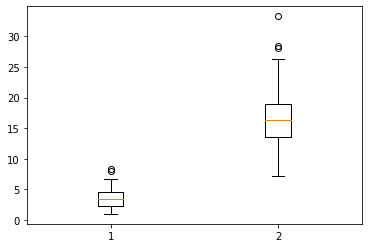

In [72]:
print(plt.boxplot([x,y]))

In [73]:
df_descriptive = df_makers.describe()
df_descriptive 

Engine Displacement    City MPG
count           127.000000  127.000000
mean              3.506438   16.482247
std               1.460354    4.298447
min               0.980000    7.250000
25%               2.340712   13.618545
50%               3.350000   16.285714
75%               4.600000   18.945364
max               8.400000   33.300000

In [87]:
q1_engine_displacement = float(df_descriptive.loc[['25%'],['Engine Displacement']].values[0])
q3_engine_displacement = float(df_descriptive.loc[['75%'],['Engine Displacement']].values[0])
q1_mpg = float(df_descriptive.loc[['25%'],['City MPG']].values[0])
q3_mpg = float(df_descriptive.loc[['75%'],['City MPG']].values[0])

In [88]:
iqr_engine_displacement = q3_engine_displacement - q1_engine_displacement
iqr_mpg = q3_mpg - q1_mpg

In [89]:
upper_engine_displacement = q3_engine_displacement + (1.5*iqr_engine_displacement)
upper_mpg = q3_mpg + (1.5*iqr_mpg)

In [90]:
upper_mpg

26.935593694618042

In [91]:
df_clean = df_makers[(df_makers['Engine Displacement']< upper_engine_displacement) & (df_makers['City MPG']<upper_mpg)]
df_clean

Make  Engine Displacement   City MPG
0                     AM General             3.350000  15.000000
1               ASC Incorporated             3.800000  14.000000
2                          Acura             2.834768  18.890728
3                     Alfa Romeo             2.556098  17.097561
4    American Motors Corporation             3.813636  16.045455
..                           ...                  ...        ...
121  Volga Associated Automobile             1.600000  18.000000
122                   Volkswagen             2.236008  21.226361
123                        Volvo             2.504742  17.981869
124        Wallace Environmental             4.315625  12.437500
125                         Yugo             1.200000  23.000000

[122 rows x 3 columns]

In [92]:
df_corr = df_clean.corr()
df_corr

Engine Displacement  City MPG
Engine Displacement               1.0000   -0.8209
City MPG                         -0.8209    1.0000

In [93]:
df_corr.iloc[0][1]**2*100

67.38766101826175

In [94]:
corr_mat = np.corrcoef(df_clean['Engine Displacement'], df_clean['City MPG'])
corr_mat

array([[ 1.        , -0.82089988],
       [-0.82089988,  1.        ]])

In [95]:
corr_mat[0,1]**2*100

67.38766101826177

# Spearman

## Supuestos

### 1. Muestra Aleatoria
### 2. Relaciones monotonica
### 3. Si acepta variables ordinales, performance de usuario.
### 4. No es ideal para variables nominales (Tipo de sangre, sexo, etc.)
### 5. Cada variable tiene su equivalente 
### 6. Son observaciones independientes

In [97]:
from scipy.stats import rankdata

In [101]:
df_clean['ranking_engine_displacement'] = rankdata(df_clean['Engine Displacement'], method='min')
df_clean['ranking_engine_city'] = rankdata(df_clean['City MPG'], method='min')
df_clean.head()

<ipython-input-101-7780b522f1ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ranking_engine_displacement'] = rankdata(df_clean['Engine Displacement'], method='min')
<ipython-input-101-7780b522f1ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ranking_engine_city'] = rankdata(df_clean['City MPG'], method='min')


Make  Engine Displacement   City MPG  \
0                   AM General             3.350000  15.000000   
1             ASC Incorporated             3.800000  14.000000   
2                        Acura             2.834768  18.890728   
3                   Alfa Romeo             2.556098  17.097561   
4  American Motors Corporation             3.813636  16.045455   

   ranking_engine_displacement  ranking_engine_city  
0                           61                   41  
1                           72                   33  
2                           49                   93  
3                           42                   73  
4                           73                   59

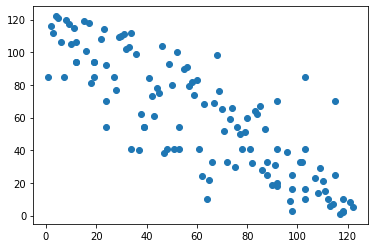

In [102]:
x= df_clean['ranking_engine_displacement']
y= df_clean['ranking_engine_city']
plt.scatter(x, y)

In [108]:
df_spearman = df_clean[['Make','ranking_engine_displacement','ranking_engine_city']]

In [109]:
df_spearman.corr('spearman')

ranking_engine_displacement  ranking_engine_city
ranking_engine_displacement                      1.00000             -0.83562
ranking_engine_city                             -0.83562              1.00000

In [112]:
stats.spearmanr(df_spearman[['ranking_engine_displacement','ranking_engine_city']])

SpearmanrResult(correlation=-0.8356204783793975, pvalue=5.1969294990845706e-33)

# Kendall

## supuestos

### 1. Alternativa a Pearson cuando fallamos en un supuesto
### 2. Altervativa a Spearman si tenemos pocos datos y muchos rankins empatados

In [113]:
df_spearman.corr('kendall')

ranking_engine_displacement  ranking_engine_city
ranking_engine_displacement                     1.000000            -0.654468
ranking_engine_city                            -0.654468             1.000000

# Seaborn

In [115]:
import seaborn as sns

In [116]:
df_clean.head()

Make  Engine Displacement   City MPG  \
0                   AM General             3.350000  15.000000   
1             ASC Incorporated             3.800000  14.000000   
2                        Acura             2.834768  18.890728   
3                   Alfa Romeo             2.556098  17.097561   
4  American Motors Corporation             3.813636  16.045455   

   ranking_engine_displacement  ranking_engine_city  
0                           61                   41  
1                           72                   33  
2                           49                   93  
3                           42                   73  
4                           73                   59

In [121]:
df_continuo = df_clean[['Engine Displacement','City MPG']]

<AxesSubplot:>

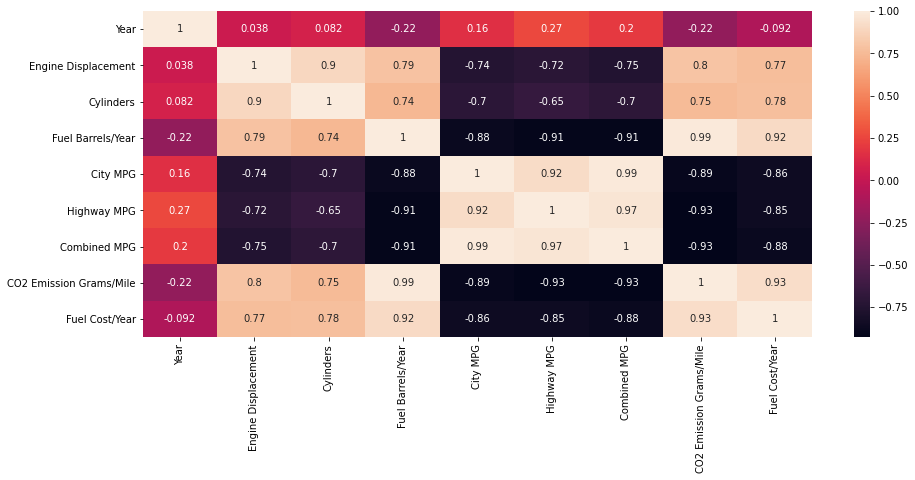

In [125]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

In [127]:
mask = np.zeros_like(df.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [128]:
np.zeros_like(df.corr(), dtype=np.bool)

<ipython-input-128-408c4938989a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.zeros_like(df.corr(), dtype=np.bool)


array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [138]:
def correlation_plot(corr, title="Heatmap"):
  mask = np.zeros_like(df.corr(),dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(15,10))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

<ipython-input-138-4680a0f5cd0a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(),dtype=np.bool)


<AxesSubplot:title={'center':'Heatmap'}>

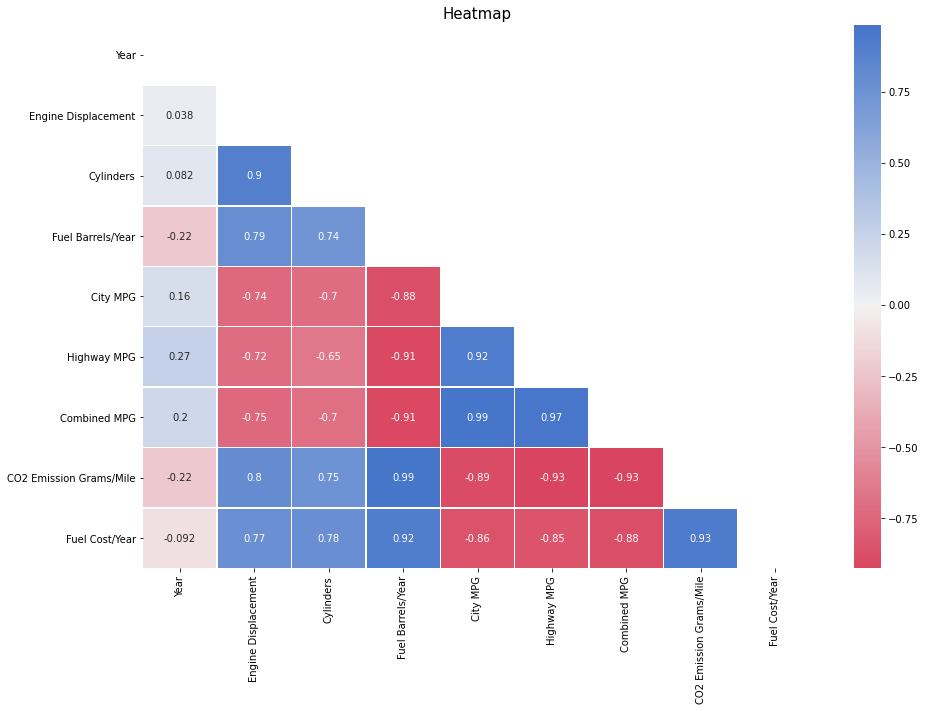

In [139]:
correlation_plot(df.corr())